EDA - Univariate & Multivariate Analysis


In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
('/content/gdrive/My Drive/UniCourseML/concrete.csv')

'/content/gdrive/My Drive/UniCourseML/concrete.csv'

In [ ]:
file_path = '/content/drive/MyDrive/UniCourseML/concrete.csv'


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv(file_path)


In [ ]:
df.head()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Plotting histograms to illustrate the distribution and central values of all variables.

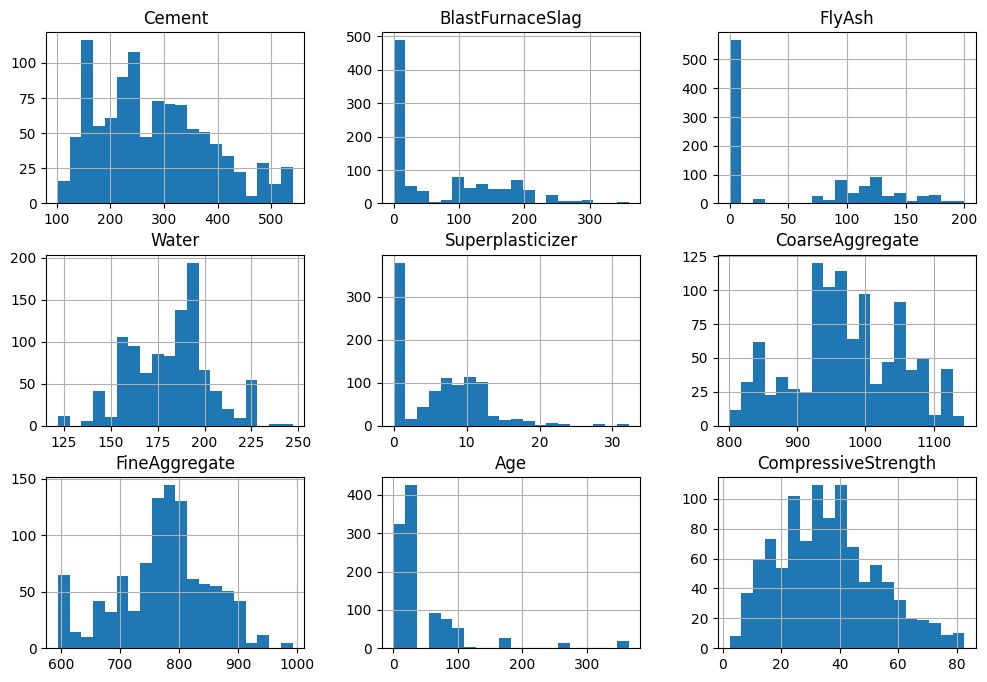

In [ ]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

In [ ]:
df.describe()


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# Employing boxplots to provide a visual summary of the distribution of a dataset and highlight any potential outliers

In [ ]:
import seaborn as sns

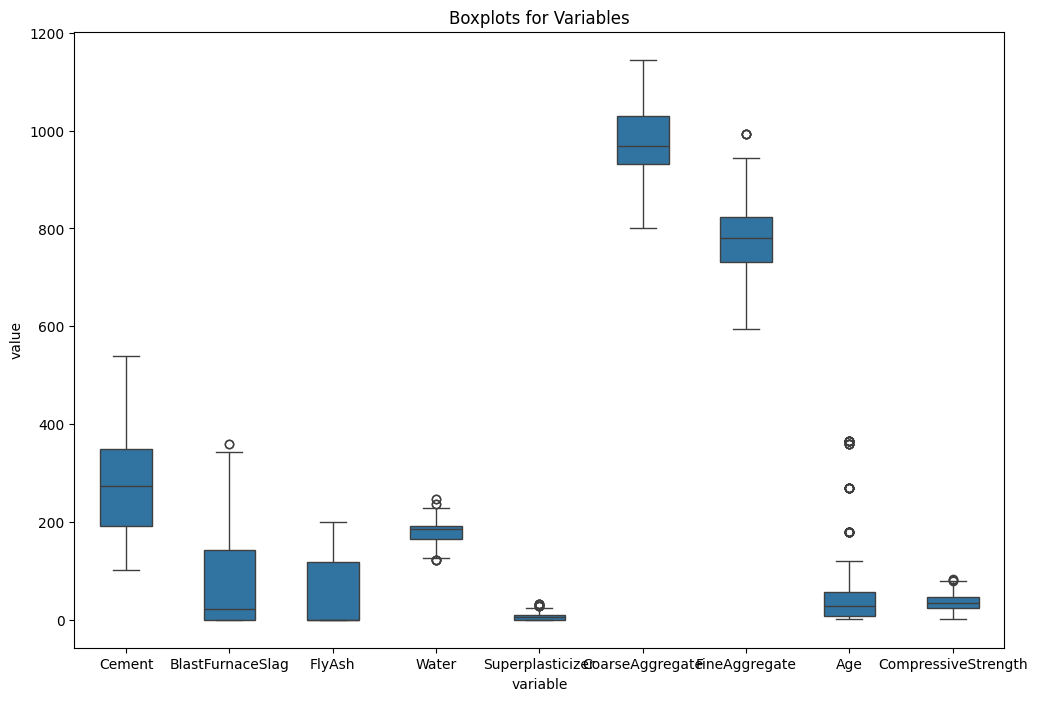

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create boxplots for each variable
sns.boxplot(x='variable', y='value', data=pd.melt(df), width=0.5)
plt.title('Boxplots for Variables')
plt.show()

In [ ]:
# A pair plot is a grid of scatterplots where each variable is compared with every other variable.

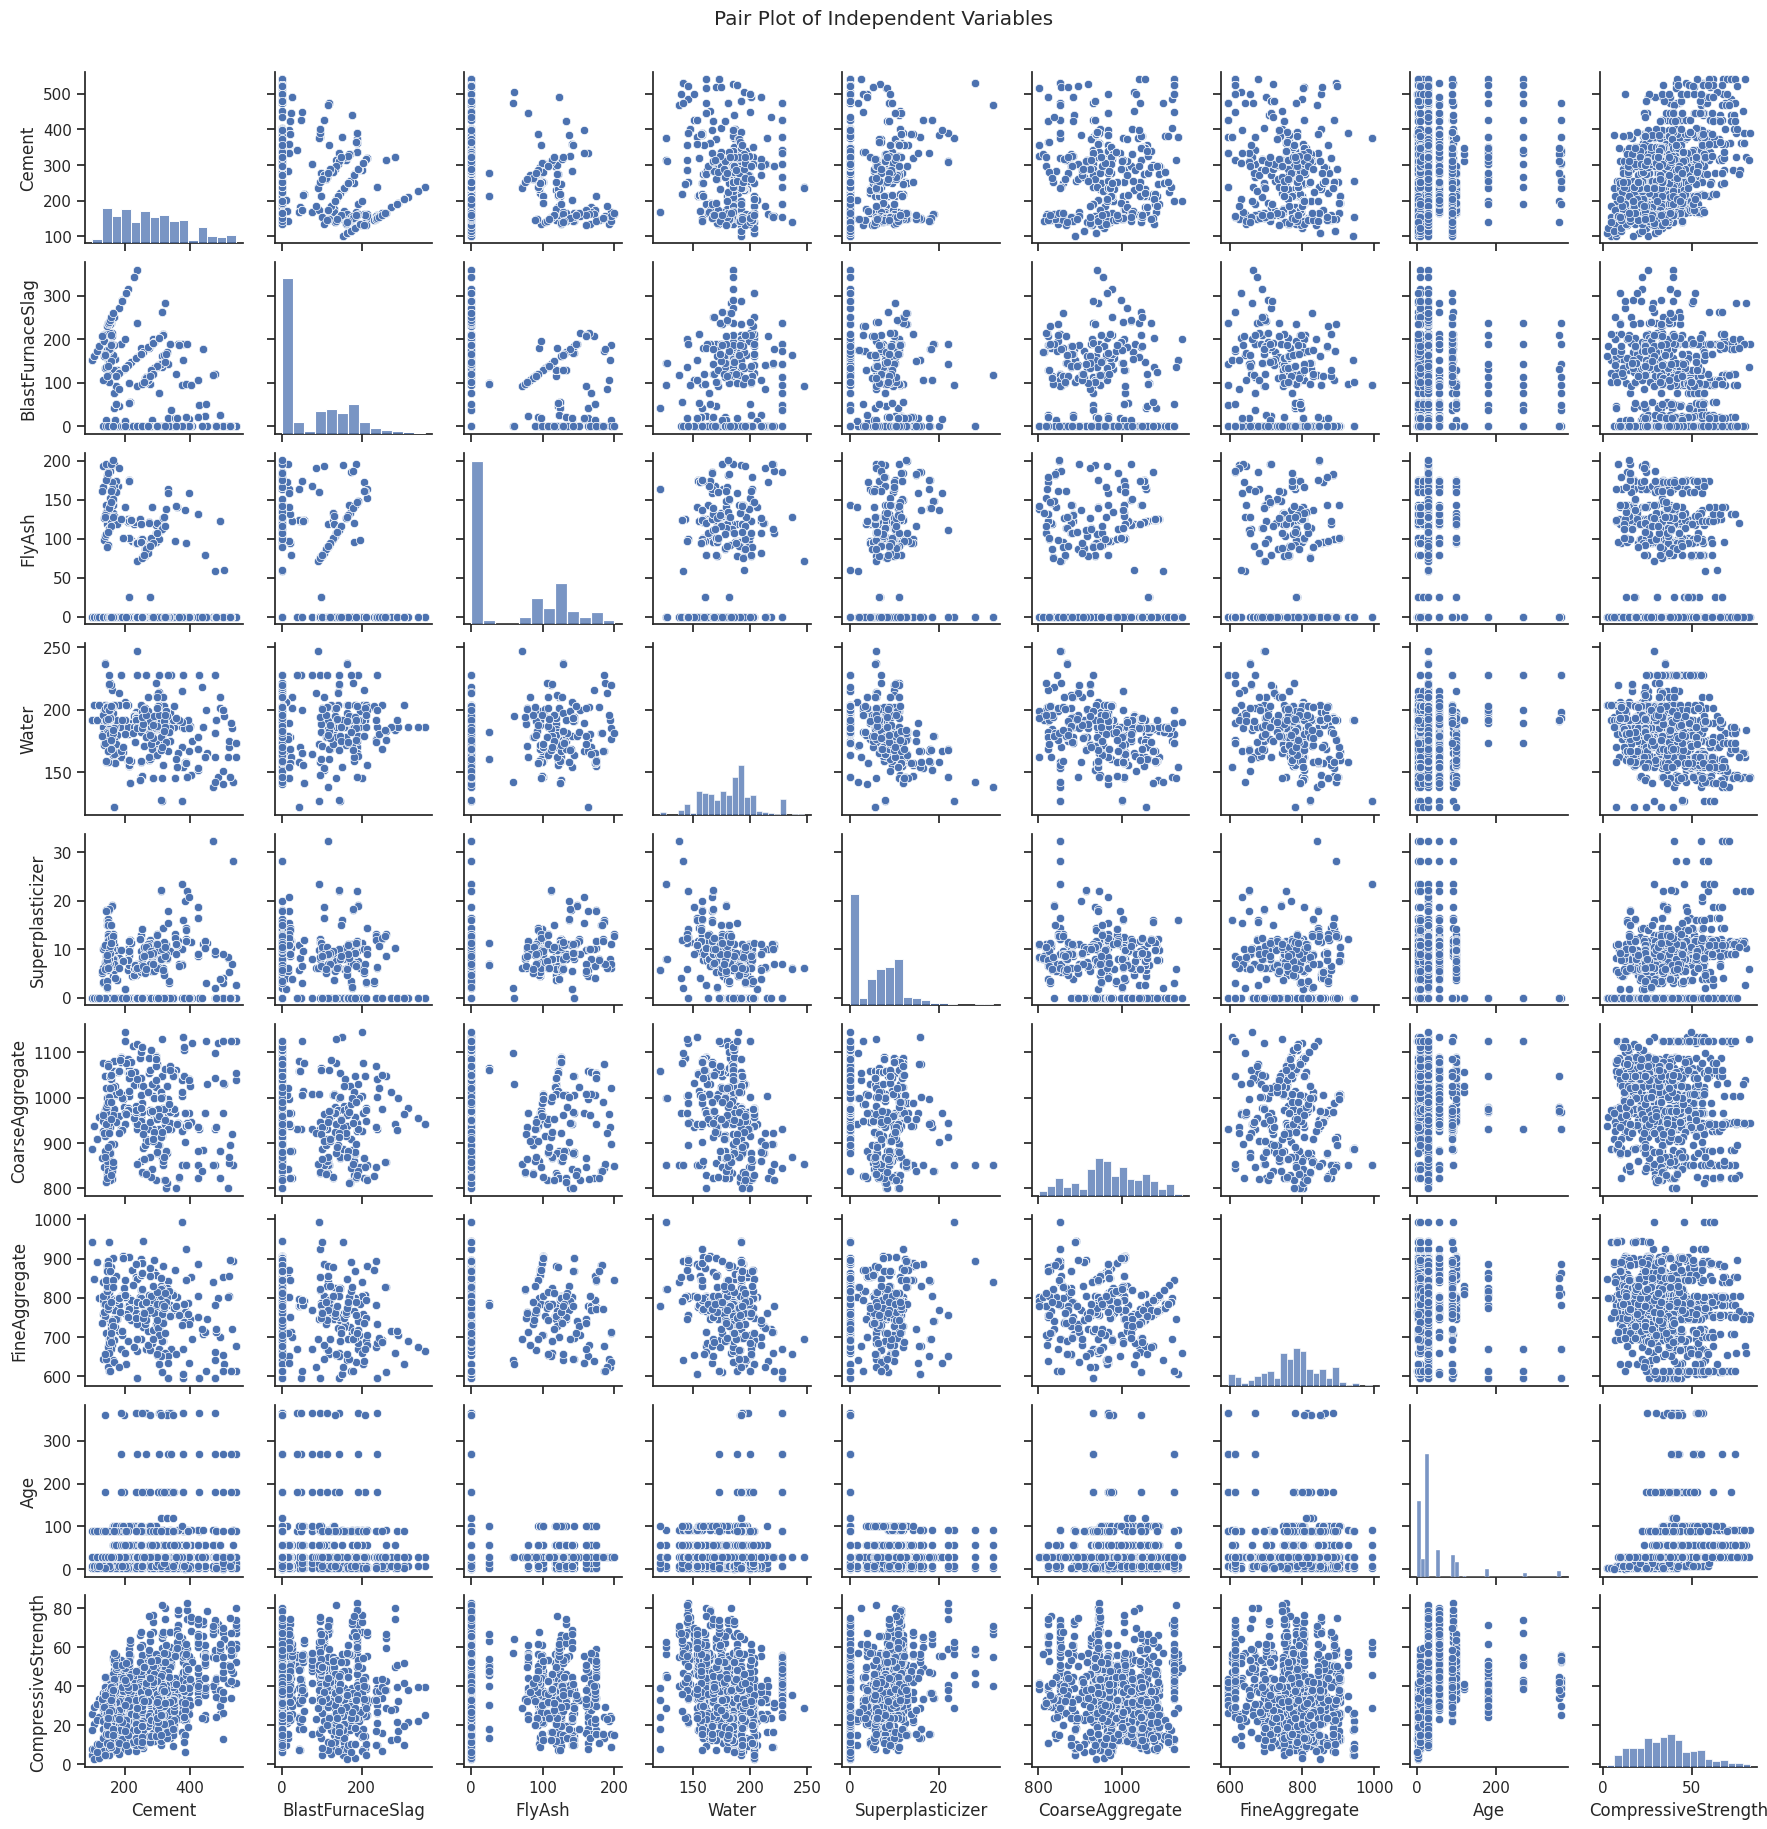

In [ ]:
# Set the style of the pair plot
sns.set(style="ticks")

# Create a pair plot for the independent variables
sns.pairplot(df, height=2)
plt.suptitle('Pair Plot of Independent Variables', y=1.02)
plt.show()

In [ ]:
#  The heatmap is a useful tool to quickly identify relationships between variables.

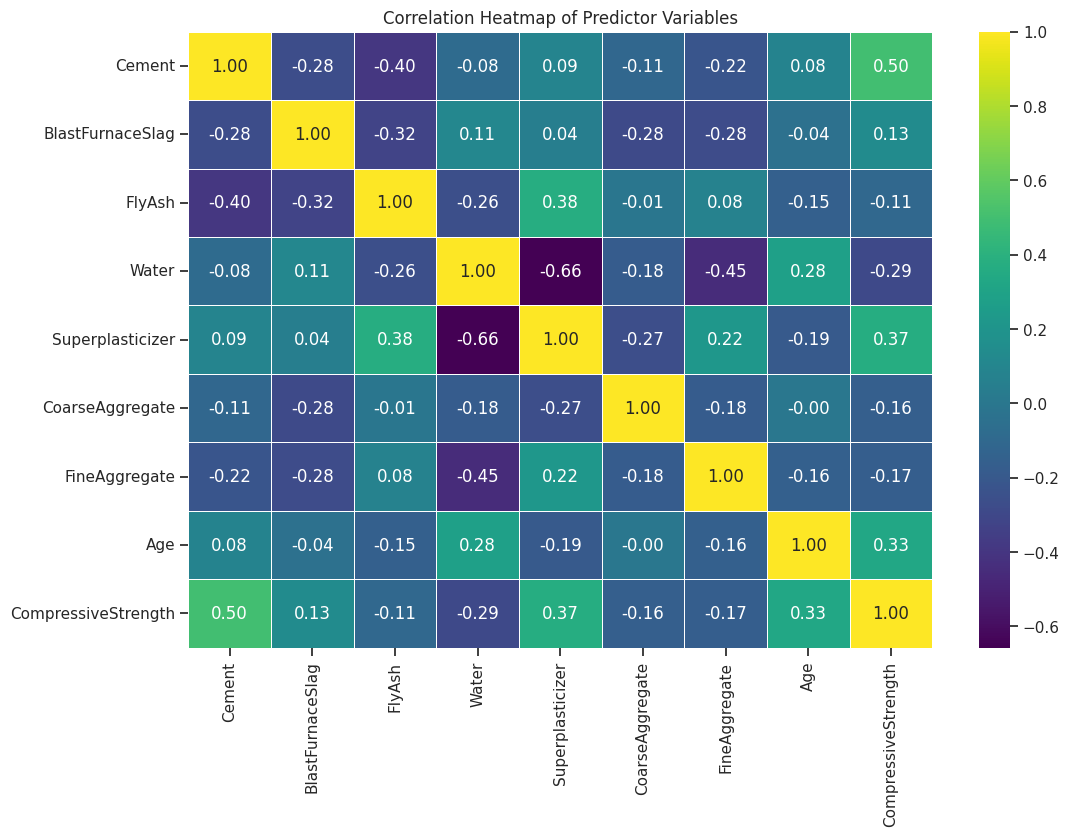

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

In [ ]:
# annot=True adds numeric annotations to the heatmap.
# cmap="coolwarm" sets the color map.
# fmt=".2f" formats the annotations to two decimal places.

Data preparation


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows if any
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows if necessary
df = df.drop_duplicates()


Duplicate Rows:
     Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
77    425.0             106.3     0.0  153.5              16.5   
80    425.0             106.3     0.0  153.5              16.5   
86    362.6             189.0     0.0  164.9              11.6   
88    362.6             189.0     0.0  164.9              11.6   
91    362.6             189.0     0.0  164.9              11.6   
100   425.0             106.3     0.0  153.5              16.5   
103   425.0             106.3     0.0  153.5              16.5   
109   362.6             189.0     0.0  164.9              11.6   
111   362.6             189.0     0.0  164.9              11.6   
123   425.0             106.3     0.0  153.5              16.5   
126   425.0             106.3     0.0  153.5              16.5   
132   362.6             189.0     0.0  164.9              11.6   
134   362.6             189.0     0.0  164.9              11.6   
137   362.6             189.0     0.0  164.9              11

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values
print("Missing Values:")
print(missing_values)



Missing Values:
Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = zscore(df)

# Set a threshold for identifying outliers
outliers = (z_scores > 3).all(axis=1)

# Remove rows with outliers
df_no_outliers = df[~outliers]


In [ ]:
# Display summary statistics after cleaning
print("Summary Statistics After Cleaning:")
print(df.describe())


Summary Statistics After Cleaning:
            Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1005.000000       1005.000000  1005.000000  1005.000000   
mean    278.631343         72.043483    55.536318   182.075323   
std     104.344261         86.170807    64.207969    21.339334   
min     102.000000          0.000000     0.000000   121.800000   
25%     190.700000          0.000000     0.000000   166.600000   
50%     265.000000         20.000000     0.000000   185.700000   
75%     349.000000        142.500000   118.300000   192.900000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1005.000000      1005.000000    1005.000000  1005.000000   
mean           6.033234       974.376816     772.688259    45.856716   
std            5.919967        77.579667      80.340435    63.734692   
min            0.000000       801.000000     594.000000     1.000000   
25%       

In [ ]:
# Count zero values in each column
zero_counts = (df == 0).sum()

# Print columns with zero values
print("Columns with Zero Values:")
print(zero_counts)


Columns with Zero Values:
Cement                   0
BlastFurnaceSlag       470
FlyAsh                 541
Water                    0
Superplasticizer       378
CoarseAggregate          0
FineAggregate            0
Age                      0
CompressiveStrength      0
dtype: int64


In [ ]:
# Impute zero values with mean
df_imputed = df.replace(0, df.mean())


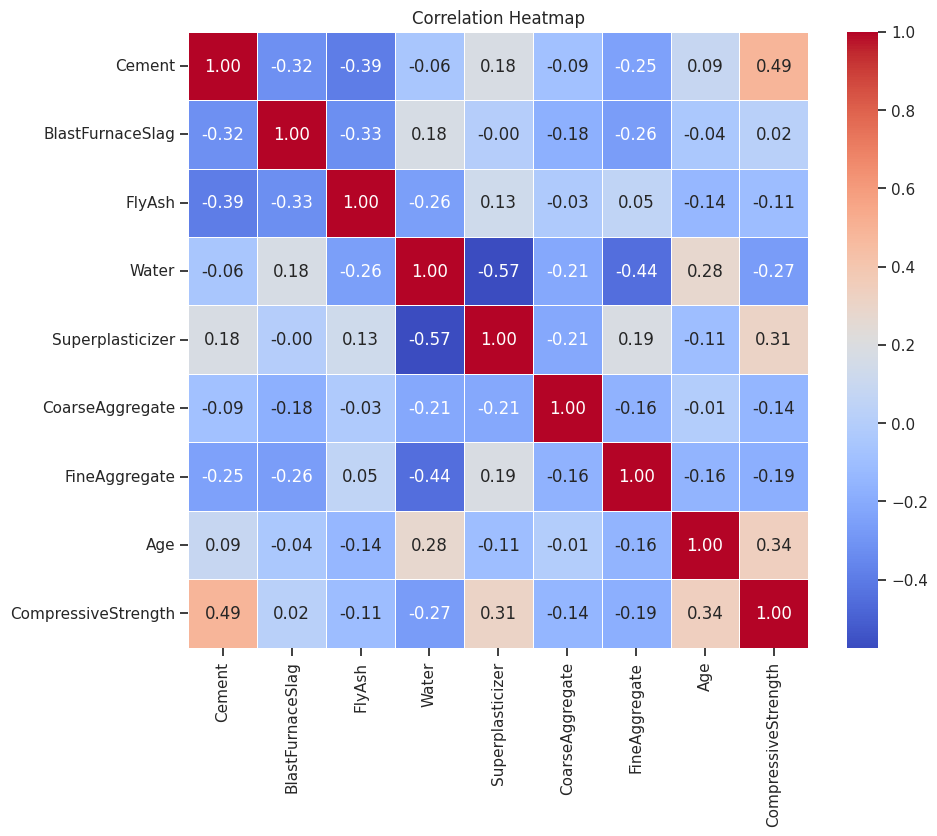

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_imputed.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Print correlation coefficients greater than a certain threshold (e.g., 0.7)
threshold = 0.7
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if abs(correlation_matrix.iloc[i, j]) > threshold]

# Print highly correlated pairs
print("Highly Correlated Variable Pairs:")
for pair in high_correlation_pairs:
    print(f"{correlation_matrix.columns[pair[0]]} - {correlation_matrix.columns[pair[1]]}: {correlation_matrix.iloc[pair[0], pair[1]]}")


Highly Correlated Variable Pairs:


Modeling & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split the dataset into train and test sets
X = df_imputed.drop(columns=['CompressiveStrength'])
y = df_imputed['CompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Models
# K-Nearest Neighbor Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Random Forest
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# XGBoost
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Step 3: Evaluate Models
# K-Nearest Neighbor Regressor
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error for K-Nearest Neighbor:", mse_knn)

# Random Forest
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error for Random Forest:", mse_rf)

# XGBoost
y_pred_xgb = xgb_regressor.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error for XGBoost:", mse_xgb)


Mean Squared Error for K-Nearest Neighbor: 116.99612046357618
Mean Squared Error for Random Forest: 31.60496824247884
Mean Squared Error for XGBoost: 25.734673828673042


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create instances of individual regressors
knn_regressor = KNeighborsRegressor()
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = xgb.XGBRegressor()

# Instantiate the VotingRegressor with the list of individual regressors
voting_regressor = VotingRegressor(estimators=[
    ('knn', knn_regressor),
    ('rf', rf_regressor),
    ('xgb', xgb_regressor)
])

# Train the VotingRegressor on the training data
voting_regressor.fit(X_train, y_train)

# Evaluate the VotingRegressor on the testing data
y_pred_voting = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred_voting)
print("Mean Squared Error for Voting Regressor:", mse_voting)


Mean Squared Error for Voting Regressor: 41.41929463947831


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create instances of individual regressors
knn_regressor = KNeighborsRegressor()
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = xgb.XGBRegressor()

# Fit individual models
knn_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Calculate metrics for individual models
models = {'K-Nearest Neighbor': knn_regressor,
          'Random Forest': rf_regressor,
          'XGBoost': xgb_regressor}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Accuracy: {r2:.2f}")
    print("")

# Calculate metrics for Voting Regressor
y_pred_voting = voting_regressor.predict(X_test)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Metrics for Voting Regressor:")
print(f"RMSE: {rmse_voting:.2f}")
print(f"MAE: {mae_voting:.2f}")
print(f"MSE: {mse_voting:.2f}")
print(f"R2 Accuracy: {r2_voting:.2f}")


Metrics for K-Nearest Neighbor:
RMSE: 10.82
MAE: 7.99
MSE: 117.00
R2 Accuracy: 0.59

Metrics for Random Forest:
RMSE: 5.62
MAE: 3.88
MSE: 31.60
R2 Accuracy: 0.89

Metrics for XGBoost:
RMSE: 5.07
MAE: 3.23
MSE: 25.73
R2 Accuracy: 0.91

Metrics for Voting Regressor:
RMSE: 6.44
MAE: 4.38
MSE: 41.42
R2 Accuracy: 0.86
